In [292]:
!pip install category_encoders==2.7.0

In [293]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [294]:
#Uploading data set
df = pd.read_csv(r'Downloads/shopping_behavior_updated.csv')

In [295]:
#Viewing and Understanding the dataset
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [296]:
#Checking for missing values
df.isnull().sum() #The dataset doesn't have any missing value

df.dtypes #Viewing all information on the dataset and types

df.describe() #Viewing Statistical summary of the numerical features

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [297]:
#Statistical Analysis
#Highest Purchased 
items_by_pa = df.groupby(['Item Purchased'])['Purchase Amount (USD)'].sum(). sort_values(ascending=False)
items_by_pa

Item Purchased
Blouse        10410
Shirt         10332
Dress         10320
Pants         10090
Jewelry       10010
Sunglasses     9649
Belt           9635
Scarf          9561
Sweater        9462
Shorts         9433
Skirt          9402
Hat            9375
Coat           9275
Socks          9252
Jacket         9249
T-shirt        9248
Shoes          9240
Sandals        9200
Boots          9018
Handbag        8857
Hoodie         8767
Backpack       8636
Sneakers       8635
Gloves         8477
Jeans          7548
Name: Purchase Amount (USD), dtype: int64

In [298]:
#Highest Purchased 
cat_by_pa = df.groupby(['Category'])['Purchase Amount (USD)'].sum(). sort_values(ascending=False)
cat_by_pa

Category
Clothing       104264
Accessories     74200
Footwear        36093
Outerwear       18524
Name: Purchase Amount (USD), dtype: int64

In [299]:
#Locational Revenue
location_by_pa = df.groupby(['Location'])['Purchase Amount (USD)'].sum(). sort_values(ascending=False)
location_by_pa.info() #To view the number of unique entries of location
location_by_pa

<class 'pandas.core.series.Series'>
Index: 50 entries, Montana to Kansas
Series name: Purchase Amount (USD)
Non-Null Count  Dtype
--------------  -----
50 non-null     int64
dtypes: int64(1)
memory usage: 800.0+ bytes


Location
Montana           5784
Illinois          5617
California        5605
Idaho             5587
Nevada            5514
Alabama           5261
New York          5257
North Dakota      5220
West Virginia     5174
Nebraska          5172
New Mexico        5014
Minnesota         4977
Pennsylvania      4926
Mississippi       4883
Alaska            4867
Vermont           4860
Louisiana         4848
Virginia          4842
Arkansas          4828
Maryland          4795
Tennessee         4772
Delaware          4758
North Carolina    4742
Texas             4712
Missouri          4691
Indiana           4655
Ohio              4649
Georgia           4645
Washington        4623
Michigan          4533
Utah              4443
South Carolina    4439
Kentucky          4402
Maine             4388
Massachusetts     4384
Oklahoma          4376
Arizona           4326
Wyoming           4309
Oregon            4243
South Dakota      4236
Connecticut       4226
Colorado          4222
New Hampshire     4219
Io

In [300]:
gender_by_pa = df.groupby(['Gender'])['Purchase Amount (USD)'].sum(). sort_values(ascending=False)
gender_by_pa

Gender
Male      157890
Female     75191
Name: Purchase Amount (USD), dtype: int64

In [301]:
season_by_pa = df.groupby(['Season'])['Purchase Amount (USD)'].sum(). sort_values(ascending=False)
season_by_pa

Season
Fall      60018
Spring    58679
Winter    58607
Summer    55777
Name: Purchase Amount (USD), dtype: int64

In [302]:
shipping_type_by_pa = df.groupby(['Shipping Type'])['Purchase Amount (USD)'].sum(). sort_values(ascending=False)
shipping_type_by_pa

Shipping Type
Free Shipping     40777
Express           39067
Store Pickup      38931
Standard          38233
2-Day Shipping    38080
Next Day Air      37993
Name: Purchase Amount (USD), dtype: int64

In [303]:
gender_by_age = df.groupby(['Gender'])['Age'].mean(). sort_values(ascending=False)
gender_by_age

Gender
Male      44.097285
Female    44.007212
Name: Age, dtype: float64

In [304]:
payment_method_by_customerID = df.groupby(['Payment Method'])['Customer ID'].count(). sort_values(ascending=False)
payment_method_by_customerID

Payment Method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: Customer ID, dtype: int64

In [305]:
#Pivot table for Dhipping type and Season
shipping_type_by_season_pivot = df.pivot_table(
    values = 'Purchase Amount (USD)',
    index = 'Season',
    columns = 'Shipping Type',
    aggfunc = 'count')
shipping_type_by_season_pivot

Shipping Type,2-Day Shipping,Express,Free Shipping,Next Day Air,Standard,Store Pickup
Season,,,,,,
Fall,154,169,168,171,168,145
Spring,178,173,164,150,157,177
Summer,145,145,179,151,166,169
Winter,150,159,164,176,163,159


In [306]:
#Pivot table for Dhipping type and Season
item_purchased_by_season_pivot = df.pivot_table(
    values = 'Purchase Amount (USD)',
    index = 'Item Purchased',
    columns = 'Season',
    aggfunc = 'count')
item_purchased_by_season_pivot

Season,Fall,Spring,Summer,Winter
Item Purchased,,,,
Backpack,34,39,45,25
Belt,41,41,39,40
Blouse,42,46,43,40
Boots,35,40,38,31
Coat,34,46,42,39
Dress,36,43,47,40
Gloves,37,42,29,32
Handbag,48,36,35,34
Hat,50,27,37,40


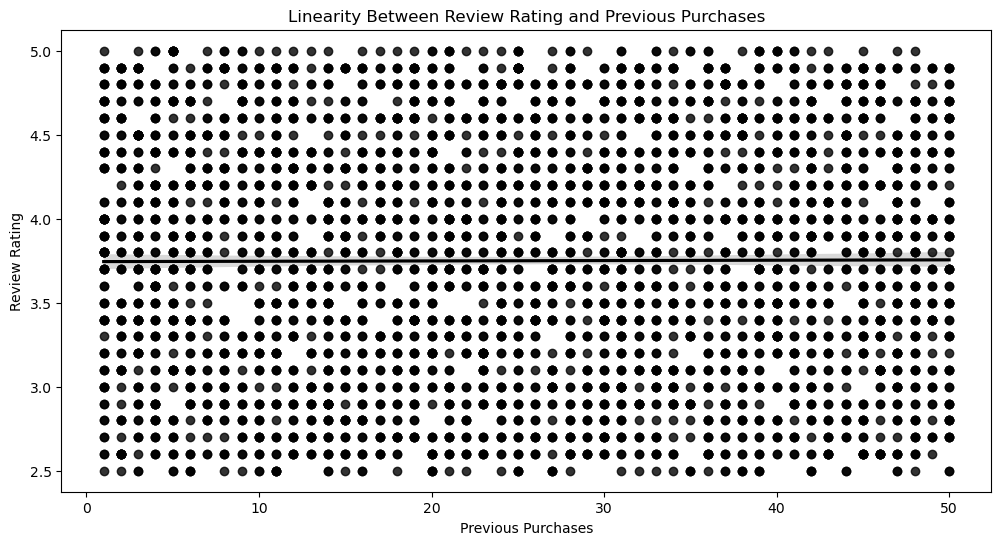

In [351]:
#Correlation Analysis
#Viewing the Linearity between Review ating and Previuous Purcahses
plt.figure(figsize= (12,6))
sns.regplot(x = df['Previous Purchases'], y = df['Review Rating'], color = 'black')
plt.title('Linearity Between Review Rating and Previous Purchases')
plt.xlabel('Previous Purchases')
plt.ylabel('Review Rating')
plt.show()

#From the Regplot, we can see that there's no linearity between the review rating and the customers' previous purchases. 
#The satisfaction does not affect the number of purchases.

In [308]:
df.head(
)
df['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

In [309]:
processed_data = df.drop(['Color', 'Promo Code Used', 'Color', 'Item Purchased', 'Size'], axis = 1)

#Label Encoding Subscription Status, Discount Applied, Size
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
processed_data['Subscription Status'] = encoder.fit_transform(processed_data['Subscription Status'])
processed_data['Discount Applied'] = encoder.fit_transform(processed_data['Discount Applied'])

#Using the mapping method for feature encoding for Frequency of Purchases
mapping = {'Weekly': 5, 'Bi-Weekly': 4, 'Fortnightly': 4, 'Monthly': 3,  'Every 3 Months': 2, 'Quarterly' : 2, 'Annually': 1}
#Encoded quarterly and every 3 months same number because they mean the same thing

processed_data['Frequency of Purchases'] = processed_data['Frequency of Purchases'].map(mapping) #mapping

processed_data

,Customer ID,Age,Gender,Category,Purchase Amount (USD),Location,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Clothing,53,Kentucky,Winter,3.1,1,Express,1,14,Venmo,4
1,2,19,Male,Clothing,64,Maine,Winter,3.1,1,Express,1,2,Cash,4
2,3,50,Male,Clothing,73,Massachusetts,Spring,3.1,1,Free Shipping,1,23,Credit Card,5
3,4,21,Male,Footwear,90,Rhode Island,Spring,3.5,1,Next Day Air,1,49,PayPal,5
4,5,45,Male,Clothing,49,Oregon,Spring,2.7,1,Free Shipping,1,31,PayPal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Clothing,28,Virginia,Summer,4.2,0,2-Day Shipping,0,32,Venmo,5
3896,3897,52,Female,Accessories,49,Iowa,Spring,4.5,0,Store Pickup,0,41,Bank Transfer,4
3897,3898,46,Female,Accessories,33,New Jersey,Spring,2.9,0,Standard,0,24,Venmo,2
3898,3899,44,Female,Footwear,77,Minnesota,Summer,3.8,0,Express,0,24,Venmo,5


In [310]:
#Generating New feature - Loyalty Metrics by summing Frequency of Purchases, Subscription Status, Previous Purchases
processed_data['Loyalty Metrics'] = processed_data[['Subscription Status', 'Previous Purchases', 'Frequency of Purchases']].sum(axis=1)
processed_data

,Customer ID,Age,Gender,Category,Purchase Amount (USD),Location,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases,Loyalty Metrics
0,1,55,Male,Clothing,53,Kentucky,Winter,3.1,1,Express,1,14,Venmo,4,19
1,2,19,Male,Clothing,64,Maine,Winter,3.1,1,Express,1,2,Cash,4,7
2,3,50,Male,Clothing,73,Massachusetts,Spring,3.1,1,Free Shipping,1,23,Credit Card,5,29
3,4,21,Male,Footwear,90,Rhode Island,Spring,3.5,1,Next Day Air,1,49,PayPal,5,55
4,5,45,Male,Clothing,49,Oregon,Spring,2.7,1,Free Shipping,1,31,PayPal,1,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Clothing,28,Virginia,Summer,4.2,0,2-Day Shipping,0,32,Venmo,5,37
3896,3897,52,Female,Accessories,49,Iowa,Spring,4.5,0,Store Pickup,0,41,Bank Transfer,4,45
3897,3898,46,Female,Accessories,33,New Jersey,Spring,2.9,0,Standard,0,24,Venmo,2,26
3898,3899,44,Female,Footwear,77,Minnesota,Summer,3.8,0,Express,0,24,Venmo,5,29


In [311]:
#Using Binary Encoder ddue to high cardinality of the Categorical columns
import category_encoders as ce


categorical_columns = processed_data[['Gender', 'Category', 'Location',
                                      'Season', 'Shipping Type', 'Payment Method']]
binary_encoder = ce.BinaryEncoder(cols = categorical_columns)
processed_data = binary_encoder.fit_transform(processed_data)

processed_data

,Customer ID,Age,Gender_0,Gender_1,Category_0,Category_1,Category_2,Purchase Amount (USD),Location_0,Location_1,...,Shipping Type_0,Shipping Type_1,Shipping Type_2,Discount Applied,Previous Purchases,Payment Method_0,Payment Method_1,Payment Method_2,Frequency of Purchases,Loyalty Metrics
0,1,55,0,1,0,0,1,53,0,0,...,0,0,1,1,14,0,0,1,4,19
1,2,19,0,1,0,0,1,64,0,0,...,0,0,1,1,2,0,1,0,4,7
2,3,50,0,1,0,0,1,73,0,0,...,0,1,0,1,23,0,1,1,5,29
3,4,21,0,1,0,1,0,90,0,0,...,0,1,1,1,49,1,0,0,5,55
4,5,45,0,1,0,0,1,49,0,0,...,0,1,0,1,31,1,0,0,1,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,1,0,0,0,1,28,1,0,...,1,0,1,0,32,0,0,1,5,37
3896,3897,52,1,0,1,0,0,49,1,0,...,1,1,0,0,41,1,0,1,4,45
3897,3898,46,1,0,1,0,0,33,1,0,...,1,0,0,0,24,0,0,1,2,26
3898,3899,44,1,0,0,1,0,77,1,0,...,0,0,1,0,24,0,0,1,5,29


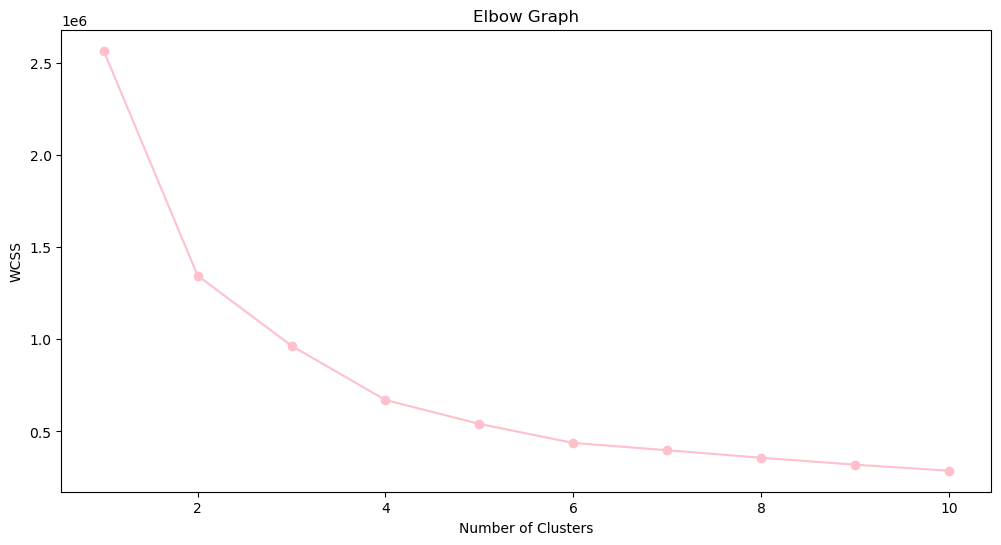

In [312]:
#Performing Kmeans Clustering
#Importing the library
from sklearn.cluster import KMeans

#Calculating WCSS for find optimal number of cluster
x = processed_data.drop(['Customer ID', 'Purchase Amount (USD)'], axis = 1)
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(x)
    wcss_values = kmeans.inertia_
    wcss.append(wcss_values)

#Plotting the graph
plt.figure(figsize=(12,6))
plt.plot(range(1,11), wcss, marker = 'o', color = 'black')
plt.title('Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [313]:
#Segmenting the customers with the cluster of 2
kmeans = KMeans(n_clusters = 2, random_state = 42)
kmeans.fit(x)

labels = kmeans.labels_

#Adding the Labels to the data
processed_data['Customer Type'] = labels
processed_data.isnull().sum()

Customer ID               0
Age                       0
Gender_0                  0
Gender_1                  0
Category_0                0
Category_1                0
Category_2                0
Purchase Amount (USD)     0
Location_0                0
Location_1                0
Location_2                0
Location_3                0
Location_4                0
Location_5                0
Season_0                  0
Season_1                  0
Season_2                  0
Review Rating             0
Subscription Status       0
Shipping Type_0           0
Shipping Type_1           0
Shipping Type_2           0
Discount Applied          0
Previous Purchases        0
Payment Method_0          0
Payment Method_1          0
Payment Method_2          0
Frequency of Purchases    0
Loyalty Metrics           0
Customer Type             0
dtype: int64

In [314]:
#Grouping by the Cluster to unddestand the segments
processed_data.groupby('Customer Type')[['Loyalty Metrics', 'Previous Purchases', 'Frequency of Purchases']].mean()

,Loyalty Metrics,Previous Purchases,Frequency of Purchases
Customer Type,,,
0,41.169326,37.858466,3.024189
1,16.100153,12.934083,2.912621


In [315]:
#Naming the CLusters
mapping = {0 : 'Loyals', 1 : 'Occasionals'}
processed_data['Customer Type'] = processed_data['Customer Type'].map(mapping)

Customer ID               0
Age                       0
Gender_0                  0
Gender_1                  0
Category_0                0
Category_1                0
Category_2                0
Purchase Amount (USD)     0
Location_0                0
Location_1                0
Location_2                0
Location_3                0
Location_4                0
Location_5                0
Season_0                  0
Season_1                  0
Season_2                  0
Review Rating             0
Subscription Status       0
Shipping Type_0           0
Shipping Type_1           0
Shipping Type_2           0
Discount Applied          0
Previous Purchases        0
Payment Method_0          0
Payment Method_1          0
Payment Method_2          0
Frequency of Purchases    0
Loyalty Metrics           0
Customer Type             0
dtype: int64

In [316]:
#Selecting Features for the Logistic Regression ML
x = processed_data.drop(['Customer ID', 'Purchase Amount (USD)', 'Customer Type'], axis = 1)
y = processed_data['Customer Type']

#Scaling Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [317]:
#Spltting the Train and Test Data
#Importing Library
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 42)


In [318]:
#Building the Model
#Importing Library
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

Accuracy Score: 98.33333333333333 %


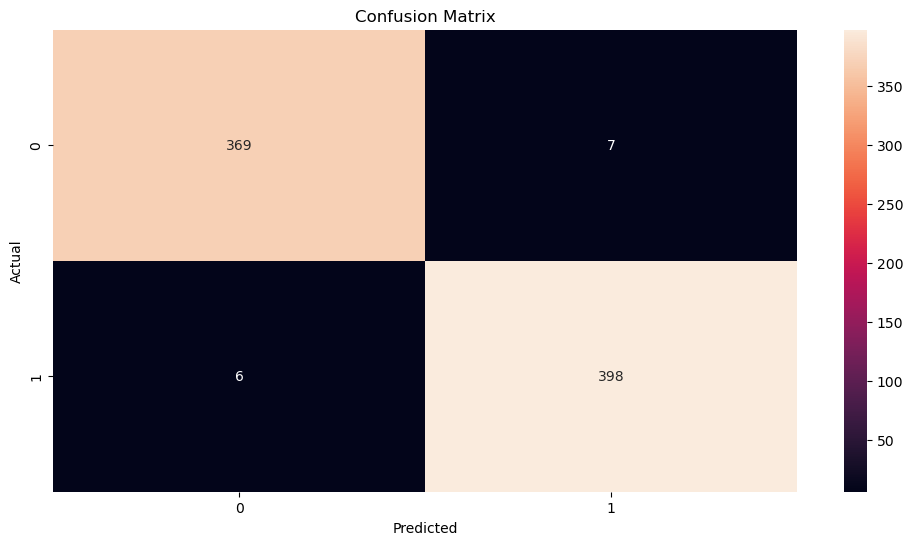

In [319]:
#Checking for Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score:', accuracy * 100, '%')

#plotting the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12,6))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()